# Deep Learning Code
## Character Recognition Algorithm


In [2]:
#Import the necessary depp learning libraries

import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt #including matplotlib to visualize data
%matplotlib inline

# RNN Demo (using a training & test dataset from mnist)
## Step 1: preparing our training dataset 
This includes importing our training dataset and the flattening it to a single dimensional array.

In [3]:
#Import training data and initialize them to variables

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [4]:
#we can check the number of test data using the len function
len(x_train)

60000

In [5]:
len(y_train)

60000

In [6]:
len(x_test)

10000

In [7]:
len(y_test)

10000

In [8]:
#we can also check the shape of our data
x_test.shape

(10000, 28, 28)

In [9]:
x_train.shape

(60000, 28, 28)

In [10]:
#we can also try to print out the binary representation of a random image by index referencing
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [11]:
#we can scale the data to provide more accuracy


In [12]:
x_test[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

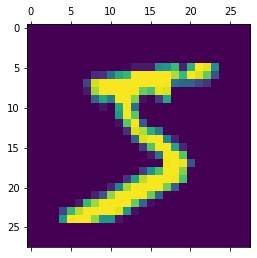

In [13]:
#The plt.matshow function can allow us to visualize our sample images

plt.matshow(x_train[0])

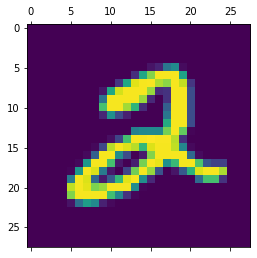

In [14]:
plt.matshow(x_train[5])

In [26]:
#we are now going to flatten our dataset using a pandas function
x_train_flattened = x_train.reshape(len(x_train), 28*28)
x_test_flattened = x_test.reshape(len(x_test), 28*28)


In [16]:
x_train_flattened.shape

(60000, 784)

In [17]:
x_test_flattened.shape

(10000, 784)

In [18]:
x_train_flattened[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

# Code for a simple Neural Network

In [48]:

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(200, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 2.4404 - accuracy: 0.8828
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3344 - accuracy: 0.9239
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2870 - accuracy: 0.9323
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2465 - accuracy: 0.9393
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2305 - accuracy: 0.9449
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2087 - accuracy: 0.9491
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2031 - accuracy: 0.9521
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1986 - accuracy: 0.9527
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1876 - accuracy: 0.9570
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.187

In [49]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2720 - accuracy: 0.9467


[0.27199023962020874, 0.9466999769210815]

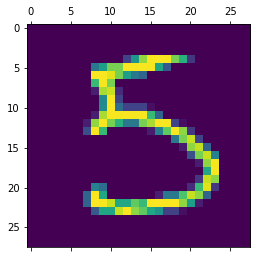

In [45]:
plt.matshow(x_test[15])

In [46]:
y_predicted = model.predict(x_test)

In [47]:
np.argmax(y_predicted[15])


5